## Required Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
import gc
from sklearn import svm
import matplotlib.pyplot as plt

C:\Users\sruth\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sruth\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\sruth\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Final_Training_V01.csv")
# Seed for reproducability
seed = 1234
#Drop target from features
df_features= df.drop("is_duplicate", axis=1)
np.random.seed(seed)
x_train, x_test, y_train, y_test = train_test_split(df_features, 
                                                  df['is_duplicate'], 
                                                  test_size=0.20, 
                                                  random_state=seed)

## Balance Dataset 

In [3]:

from imblearn.over_sampling import RandomOverSampler

# data distribution for training is 63 : 36

over = RandomOverSampler(sampling_strategy="minority")

# transform the dataset

X_smote, y_smote = over.fit_resample(x_train, y_train)

## Normalize the Dataset

In [4]:
#Normalize the dataset
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
x_train_normalized = sc.fit_transform(X_smote)
x_test_normalized = sc.transform(x_test)

In [5]:
#Reference: https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr
from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_smote)
train_len = len(y_smote)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.5 Class 1:  0.5
---------- Distribution of output variable in train data ----------
Class 0:  0.36808013974987247 Class 1:  0.36808013974987247


In [6]:
#Reference: https://colab.research.google.com/drive/1YQoysuPgCDJ_HyOuclAYMVd04JNAjzP6#scrollTo=Wb2tOE3GtASr

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(y_test, y_predict):
    C = confusion_matrix(y_test, y_predict)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Random Model

Log loss on test Data using Random Model 0.88575348412066


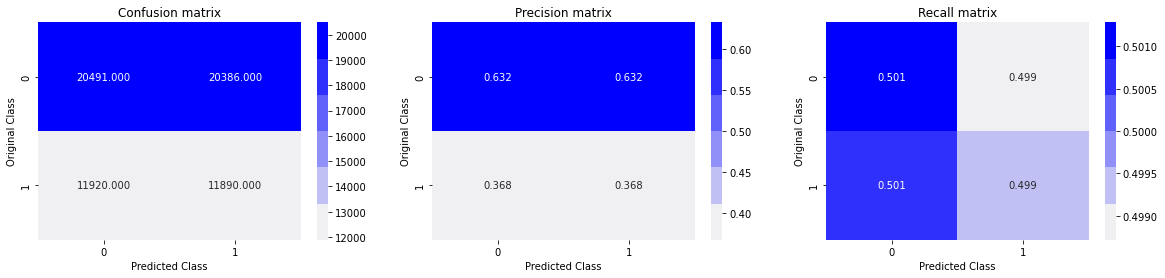

In [7]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns


random_predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    random_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on test Data using Random Model",log_loss(y_test, random_predicted_y, eps=1e-15))

random_predicted_y =np.argmax(random_predicted_y, axis=1)
plot_confusion_matrix(y_test, random_predicted_y)
print("\nAUC: ", roc_auc_score(y_test, random_predicted_y))
RocCurveDisplay.from_predictions(y_test, random_predicted_y)
plt.savefig('ROC', dpi=300)
plt.show()

## Support Vector Machine

### SVM before Dimensionality Reduction

Time taken for SVM to train before TSVD : 165.30397259999998
[[32680  8197]
 [ 4661 19149]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     40877
           1       0.70      0.80      0.75     23810

    accuracy                           0.80     64687
   macro avg       0.79      0.80      0.79     64687
weighted avg       0.81      0.80      0.80     64687

0.8012274491010558


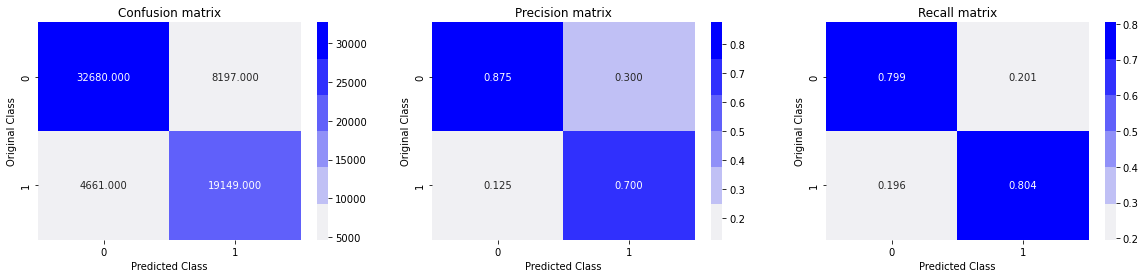

In [8]:
#Code for accuracy of classification model
start = timer()
###################################USe your own classifier here insted of random forest
svc_clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, max_iter=3000)

#print accuracy scores
svc_clf.fit(x_train_normalized, y_smote)
print("Time taken for SVM to train before TSVD :", timer()-start)
clf_predict = svc_clf.predict(x_test_normalized)
print(confusion_matrix(y_test, clf_predict))
print(classification_report(y_test, clf_predict))
print(accuracy_score(y_test, clf_predict))

plot_confusion_matrix(y_test, clf_predict)


AUC:  0.8018567503249343


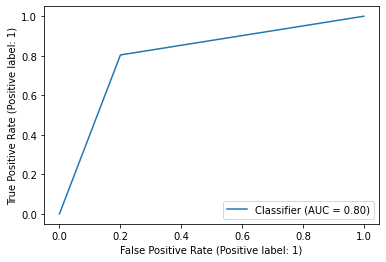

In [9]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

print("\nAUC: ", roc_auc_score(y_test, clf_predict))
RocCurveDisplay.from_predictions(y_test, clf_predict)
plt.savefig('ROC', dpi=300)
plt.show()

### Hyperparamter tuning without dimensionality reduction

For values of alpha =  1e-05 The log loss is: 0.42620175637501106
For values of alpha =  0.0001 The log loss is: 0.4158484863707652
For values of alpha =  0.001 The log loss is: 0.4632454254047667
For values of alpha =  0.01 The log loss is: 0.4443505812364104
For values of alpha =  0.1 The log loss is: 0.5195110937591231
For values of alpha =  1 The log loss is: 0.6931471805599453
For values of alpha =  10 The log loss is: 0.6931471805599453


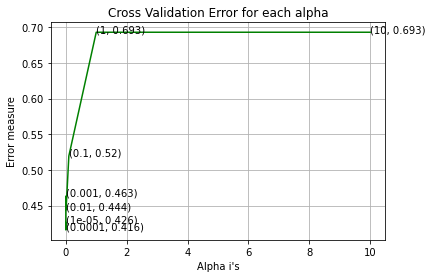

Time taken for identifying best alpha : 2697.3540970999998
Time taken for best SVM model: 273.1216494999999
For values of best alpha =  0.0001 The train log loss is: 0.41326757970731826
For values of best alpha =  0.0001 The test log loss is: 0.4158484863707652
Total number of data points : 64687


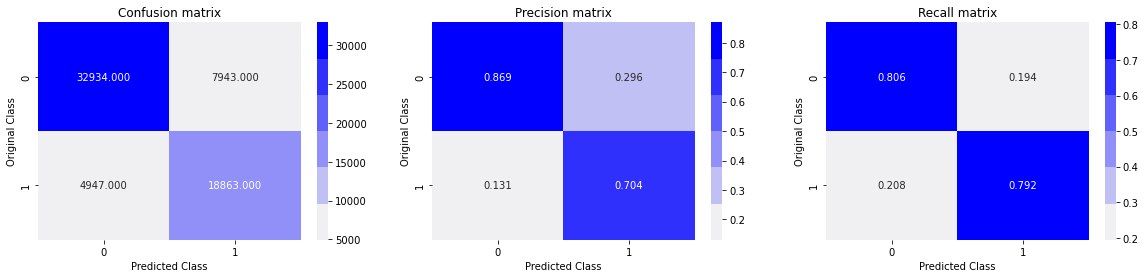

In [10]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

start_alphas = timer()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_normalized, y_smote)
    predict_y = sig_clf.predict_proba(x_test_normalized)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

print("Time taken for identifying best alpha :", timer()-start_alphas)

best_alpha = np.argmin(log_error_array)

start = timer()

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_normalized, y_smote)

print("Time taken for best SVM model without tsvd, calibrated:", timer()-start)
predict_y = sig_clf.predict_proba(x_train_normalized)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_smote, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_normalized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [11]:
score =accuracy_score(y_test,predicted_y)
print("Optimized Model Accuracy", score)

Optimized Model Accuracy 0.8007327592870283



AUC:  0.7989577520630031


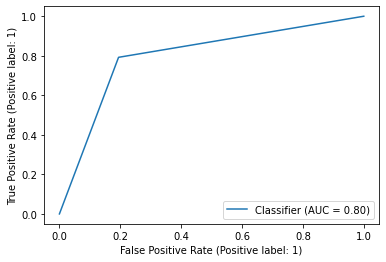

In [12]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

print("\nAUC: ", roc_auc_score(y_test, predicted_y))
RocCurveDisplay.from_predictions(y_test, predicted_y)
plt.savefig('ROC', dpi=300)
plt.show()

In [13]:
#Clear the memory with Garbage Collect
gc.collect()

34480

## Dimension Reduction Using TSVD

In [14]:
from sklearn.decomposition import TruncatedSVD

n_components = 300
svd_x_train = TruncatedSVD(n_components=n_components)
svd_x_train.fit(x_train_normalized)

svd_x_test = TruncatedSVD(n_components=n_components)
svd_x_test.fit(x_test_normalized)

x_train_after_svd = svd_x_train.transform(x_train_normalized)
x_test_after_svd = svd_x_train.transform(x_test_normalized)

Time taken for SVM to train  : 18.865768200000275
[[30855 10022]
 [ 5019 18791]]

 classification_report :
               precision    recall  f1-score   support

           0       0.86      0.75      0.80     40877
           1       0.65      0.79      0.71     23810

    accuracy                           0.77     64687
   macro avg       0.76      0.77      0.76     64687
weighted avg       0.78      0.77      0.77     64687


Log loss on train data 8.031068828687324

 Accuracy Score : 0.7674803283503641


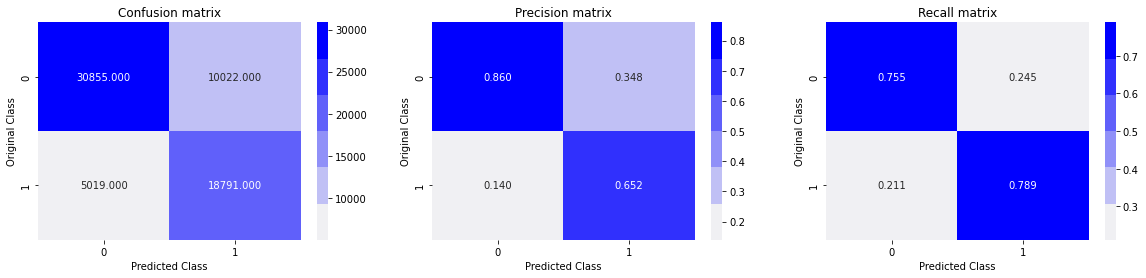

In [24]:
#Code for accuracy of classification model
start = timer()
###################################USe your own classifier here insted of random forest
svc_tsvd_clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, max_iter=3000)

#print accuracy scores
svc_tsvd_clf.fit(x_train_after_svd, y_smote)
print("Time taken for SVM to train  :", timer()-start)
clf_tsvd_predict = svc_tsvd_clf.predict(x_test_after_svd)
print(confusion_matrix(y_test, clf_tsvd_predict))
print("\n classification_report :\n",classification_report(y_test, clf_tsvd_predict))
print("\nLog loss on train data",log_loss(y_test, clf_tsvd_predict, eps=1e-15))

print("\n Accuracy Score :", accuracy_score(y_test, clf_tsvd_predict))

plot_confusion_matrix(y_test, clf_tsvd_predict)


Log loss on train data 8.031068828687324

AUC:  0.7720158339206677


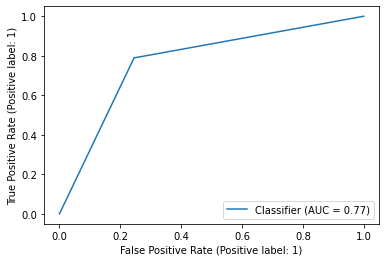

In [23]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

print("\nLog loss on train data",log_loss(y_test, clf_tsvd_predict, eps=1e-15))
print("\nAUC: ", roc_auc_score(y_test, clf_tsvd_predict))
RocCurveDisplay.from_predictions(y_test, clf_tsvd_predict)
plt.savefig('ROC', dpi=300)
plt.show()

## Hyperparameter Tuning after dimensionality reduction

For values of alpha =  1e-05 The log loss is: 0.4750741717134907
For values of alpha =  0.0001 The log loss is: 0.4621726523863997
For values of alpha =  0.001 The log loss is: 0.4601304252464358
For values of alpha =  0.01 The log loss is: 0.5016160987336248
For values of alpha =  0.1 The log loss is: 0.5729424081196524
For values of alpha =  1 The log loss is: 0.68727253712997
For values of alpha =  10 The log loss is: 0.6931471805599453


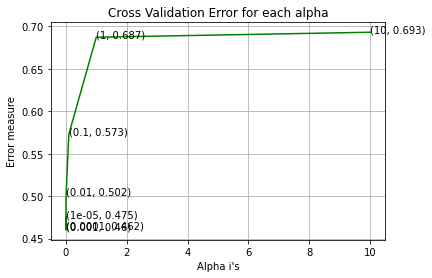

For values of best alpha =  0.001 The train log loss is: 0.45727815134169336
For values of best alpha =  0.001 The test log loss is: 0.4601304252464358
Total number of data points : 64687


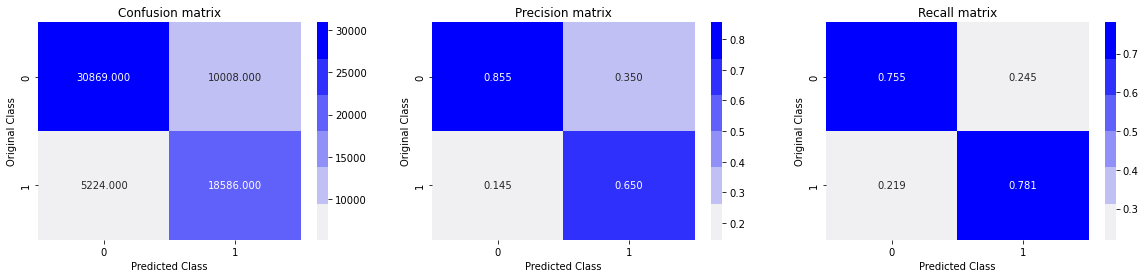

In [25]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

start = timer()

log_error_array=[]
for i in alpha:
    tsvd_clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    sig_tsvd_clf = CalibratedClassifierCV(tsvd_clf, method="sigmoid")
    sig_tsvd_clf.fit(x_train_after_svd, y_smote)
    tsvd_predict_y = sig_tsvd_clf.predict_proba(x_test_after_svd)
    log_error_array.append(log_loss(y_test, tsvd_predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, tsvd_predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
tsvd_clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
sig_tsvd_clf = CalibratedClassifierCV(tsvd_clf, method="sigmoid")
sig_tsvd_clf.fit(x_train_after_svd, y_smote)

tsvd_predict_y = sig_tsvd_clf.predict_proba(x_train_after_svd)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_smote, tsvd_predict_y,eps=1e-15))
tsvd_predict_y = sig_tsvd_clf.predict_proba(x_test_after_svd)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, tsvd_predict_y,eps=1e-15))
predicted_tsvd_y =np.argmax(tsvd_predict_y,axis=1)
print("Total number of data points :", len(predicted_tsvd_y))
plot_confusion_matrix(y_test, predicted_tsvd_y)

In [26]:
score =accuracy_score(y_test,predicted_tsvd_y)
print("Optimized Model Accuracy", score)

Optimized Model Accuracy 0.7645276485228871



AUC:  0.7678821654625937


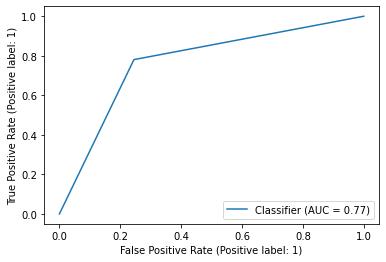

In [27]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

print("\nAUC: ", roc_auc_score(y_test, predicted_tsvd_y))
RocCurveDisplay.from_predictions(y_test, predicted_tsvd_y)
plt.savefig('ROC', dpi=300)
plt.show()

 The best parameter for LR model is alpha = 0.001, the lowest train log-loss and test log-loss we got around 0.4401, and the model doesn't overfit. 

## Model performance on TEST DATA

In [28]:
df_test = pd.read_csv("Final_Test_V01.csv")
  
#Read all features except Target features as X
#Read target feature as y
x_final_test = df_test.drop('is_duplicate',axis=1).to_numpy()
y_final_test = df_test['is_duplicate'].to_numpy()

In [29]:
#Normalize the Data
sc = StandardScaler()
x_test_normalized = sc.fit_transform(x_final_test)

In [30]:
y_pred = sig_clf.predict(x_test_normalized)
y_pred_prob = sig_clf.predict_proba(x_test_normalized)

In [31]:
print("\nClassification Report: \n", classification_report(y_final_test, y_pred))
print("\nLog loss on test Data using best Model",log_loss(y_final_test, y_pred, eps=1e-15))
print("\nAccuracy Score: ", accuracy_score(y_final_test, y_pred))
print("\nAUC: ", roc_auc_score(y_final_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81     51005
           1       0.65      0.87      0.75     29853

    accuracy                           0.78     80858
   macro avg       0.78      0.80      0.78     80858
weighted avg       0.81      0.78      0.78     80858


Log loss on test Data using best Model 7.570150190803953

Accuracy Score:  0.7808256449578272

AUC:  0.7988083398674088


### ROC

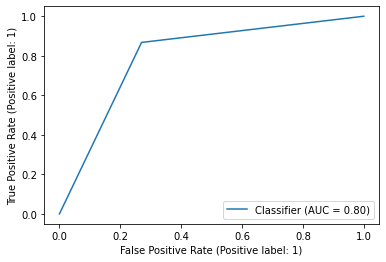

In [32]:
RocCurveDisplay.from_predictions(y_final_test, y_pred)
plt.savefig('ROC', dpi=300)
plt.show()

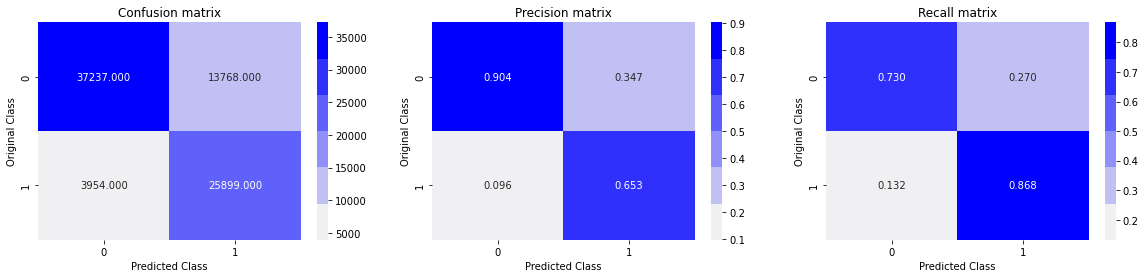

In [33]:
plot_confusion_matrix(y_final_test, y_pred)